# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

Correlation Coefficient: The correlation coefficient of 0.84 between mouse weight and average tumor volume for the Capomulin Regimen indicates a strong positive linear relationship between these two variables. However, it is essential to note that the correlation is not perfect, as it falls short of 1. This suggests that while there is a significant association between mouse weight and tumor volume, other factors may also contribute to the variability in tumor volume.

R-Squared Value: The R-squared value of 0.71 indicates that approximately 71% of the variability in the average tumor volume can be explained by the linear relationship with mouse weight. This suggests that mouse weight is a relevant predictor for understanding variations in tumor volume, but there are still other factors contributing to the remaining variability.

Outliers in Treatment Regimens: Among the four most promising treatments, only Infubinol showed potential outliers. Outliers can significantly impact statistical analyses, and caution should be exercised when interpreting the results for Infubinol. However, the data for the other three treatments (Capomulin, Ramicane, and Ceftamin) can be considered reliable for further analysis.

Ramicane Regimen: Ramicane stands out as a promising treatment with several favorable characteristics. It has the smallest tumor volume, indicating its effectiveness in reducing tumor size. The smallest variance and standard deviation suggest that the data points are closely packed around the mean, implying consistency and reliability in treatment outcomes. Additionally, the minimal difference between the mean and median indicates that the data for Ramicane is approximately normally distributed.

In summary, the analysis reveals that mouse weight is significantly associated with average tumor volume for the Capomulin Regimen, but there are still other factors influencing tumor volume. While the data for the three treatments (Capomulin, Ramicane, and Ceftamin) appear reliable, caution is needed when interpreting results for Infubinol due to potential outliers. Ramicane emerges as a promising treatment with notable advantages, including small tumor volume, low variance, and near-normal distribution of data.

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
print("Number of mice:", num_mice)

Number of mice: 249


In [26]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mouse_id = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_id

 #Displaying the duplicate mice
print("Duplicate Mice:")
print(duplicate_mouse_id)

Duplicate Mice:
['g989']


In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_id)]

# Filter the combined_data DataFrame for the duplicate mouse ID
duplicate_mice = duplicate_mice.sort_values(by=['Mouse ID', 'Timepoint'])

# Displaying all the data for the duplicate mouse ID
print(duplicate_mice)



    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_id)==False]



In [29]:

# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data["Mouse ID"].nunique()
print("Number of mice in the clean DataFrame:", num_mice_clean)


Number of mice in the clean DataFrame: 248


## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
#summary statistics table for each regimen
import numpy as np

#group DataFrame by Regimen
grouped = clean_data.groupby('Drug Regimen')

#mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen calculation
mean = grouped['Tumor Volume (mm3)'].mean()
median = grouped['Tumor Volume (mm3)'].median()
variance = grouped['Tumor Volume (mm3)'].var()
std_dev = grouped['Tumor Volume (mm3)'].std()
sem = grouped['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame
summary_table = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Std Dev': std_dev, 'SEM': sem})

# Print the summary DataFrame
print(summary_table)

                   Mean     Median   Variance   Std Dev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [31]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Using the aggregation method to produce the summary statistics in a single line
# Using the aggregation method to produce the summary statistics in a single line
summary_stats_df = clean_data.groupby("Drug Regimen").agg(
    mean_tumor_vol=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="mean"),
    median_tumor_vol=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="median"),
    variance_tumor_vol=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="var"),
    std_dev_tumor_vol=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="std"),
    sem_tumor_vol=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="sem")
)

# Display the summary statistics DataFrame
print("Summary Statistics Table:")
print(summary_stats_df)


Summary Statistics Table:
              mean_tumor_vol  median_tumor_vol  variance_tumor_vol  \
Drug Regimen                                                         
Capomulin          40.675741         41.557809           24.947764   
Ceftamin           52.591172         51.776157           39.290177   
Infubinol          52.884795         51.820584           43.128684   
Ketapril           55.235638         53.698743           68.553577   
Naftisol           54.331565         52.509285           66.173479   
Placebo            54.033581         52.288934           61.168083   
Propriva           52.320930         50.446266           43.852013   
Ramicane           40.216745         40.673236           23.486704   
Stelasyn           54.233149         52.431737           59.450562   
Zoniferol          53.236507         51.818479           48.533355   

              std_dev_tumor_vol  sem_tumor_vol  
Drug Regimen                                    
Capomulin              4.994774    

## Bar and Pie Charts

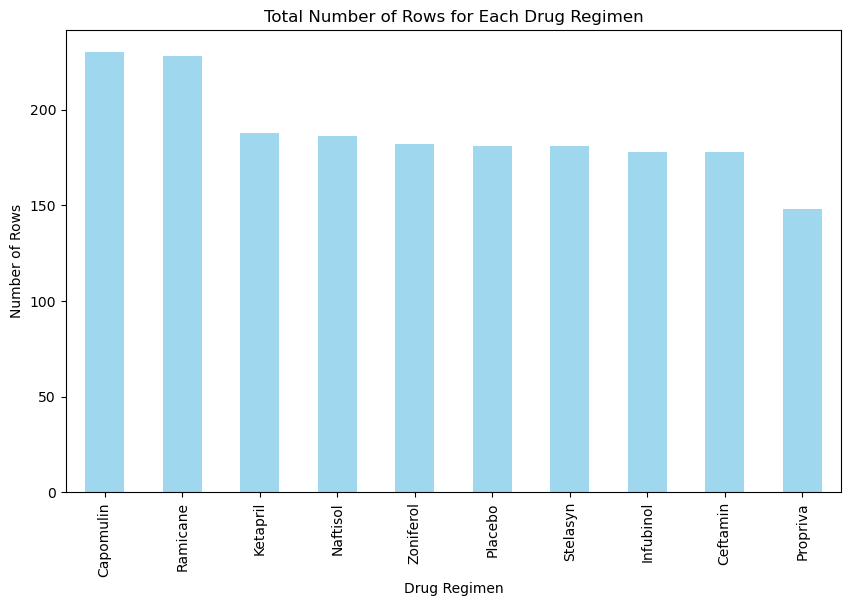

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_data["Drug Regimen"].value_counts()

# Generate the bar plot
ax = drug_regimen_counts.plot(kind='bar', color='skyblue', alpha=0.8, figsize=(10, 6))

# Set the plot title and labels
ax.set_title("Total Number of Rows for Each Drug Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Rows")

# Show the plot
plt.show()

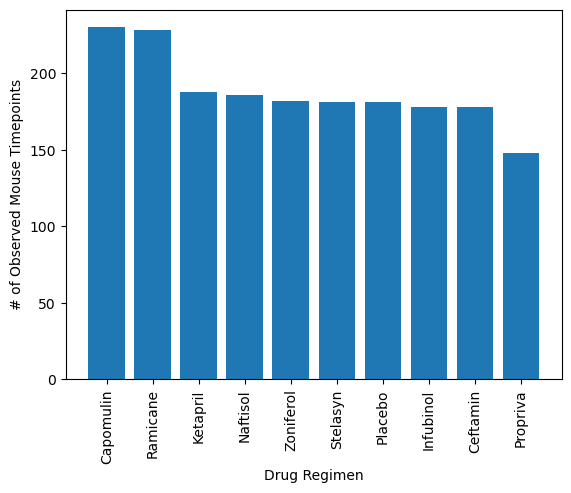

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


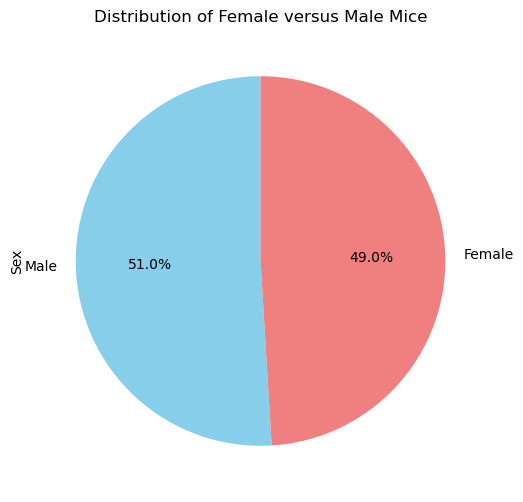

In [33]:
# Count the number of female and male mice
gender_counts = clean_data["Sex"].value_counts()

# Generate the pie plot
ax = gender_counts.plot(kind='pie', colors=['skyblue', 'lightcoral'], autopct='%1.1f%%', startangle=90, figsize=(6, 6))

# Set the plot title
ax.set_title("Distribution of Female versus Male Mice")

# Equal aspect ratio ensures that the pie is drawn as a circle.
ax.set_aspect('equal')

# Show the plot
plt.show()

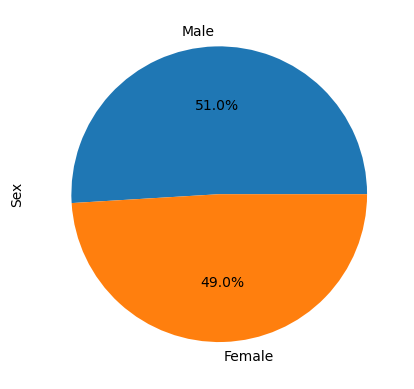

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Select the treatment regimens of interest
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Get the last (greatest) timepoint for each mouse in the selected treatment regimens
last_timepoint = clean_data.loc[clean_data["Drug Regimen"].isin(treatment_regimens)].groupby("Mouse ID")["Timepoint"].max()

# Merge the group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(clean_data, last_timepoint, on=["Mouse ID", "Timepoint"])

# Display the DataFrame with final tumor volume for each mouse in the selected treatment regimens
print("Final Tumor Volume for each mouse across selected treatment regimens:")
print(final_tumor_volume_df)

Final Tumor Volume for each mouse across selected treatment regimens:
   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16         45   
1      s185    Capomulin  Female           3          17         45   
2      x401    Capomulin  Female          16          15         45   
3      m601    Capomulin    Male          22          17         45   
4      g791     Ramicane    Male          11          16         45   
..      ...          ...     ...         ...         ...        ...   
95     x822     Ceftamin    Male           3          29         45   
96     y163    Infubinol  Female          17          27         45   
97     y769     Ceftamin  Female           6          27         45   
98     y865     Ceftamin    Male          23          26         45   
99     z581    Infubinol  Female          24          25         45   

    Tumor Volume (mm3)  Metastatic Sites  
0            22.050126            

In [35]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

# Step 1: Put treatments into a list for a for loop (and later for plot labels)
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Step 2: Create an empty list to fill with tumor volume data (for plotting)
tumor_volume_data = []

# Step 3: Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_regimens:
    # Step 4: Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume_subset = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Step 5: Add the subset of tumor volume data for each treatment regimen
    tumor_volume_data.append(tumor_volume_subset)
    
    # Step 6: Determine outliers using upper and lower bounds
    quartiles = tumor_volume_subset.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    outliers = tumor_volume_subset[(tumor_volume_subset < lower_bound) | (tumor_volume_subset > upper_bound)]
    
    print(f"\nTreatment Regimen: {treatment}")
    print(f"Interquartile Range (IQR): {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers}")






Treatment Regimen: Capomulin
Interquartile Range (IQR): 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment Regimen: Ramicane
Interquartile Range (IQR): 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment Regimen: Infubinol
Interquartile Range (IQR): 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: 58    36.321346
Name: Tumor Volume (mm3), dtype: float64

Treatment Regimen: Ceftamin
Interquartile Range (IQR): 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


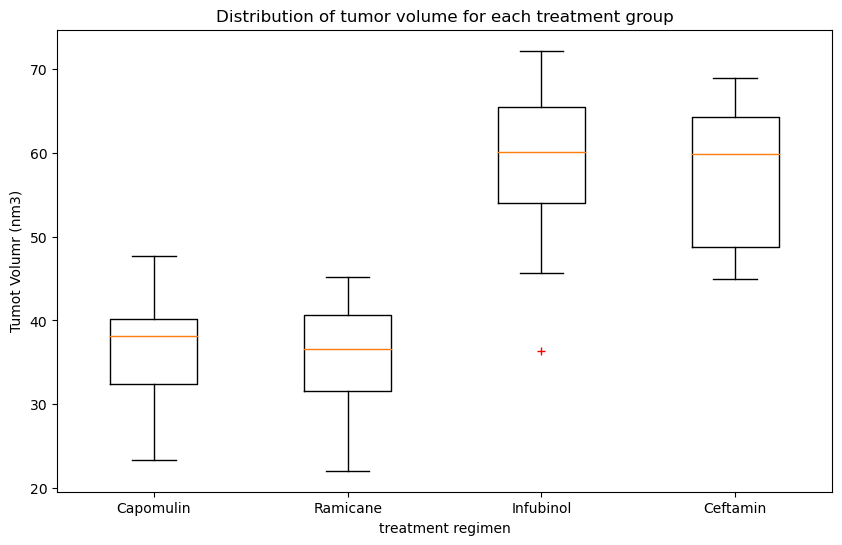

In [36]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt 

# Generate the box plot for the distribution of tumor volume for each treatment group
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatment_regimens, sym='r+')

# Generate the box plot for the distribution of tumor volume for each treatment group
plt.title("Distribution of tumor volume for each treatment group")
plt.xlabel("treatment regimen")
plt.ylabel("Tumot Volumr (nm3)")

plt.show()

## Line and Scatter Plots

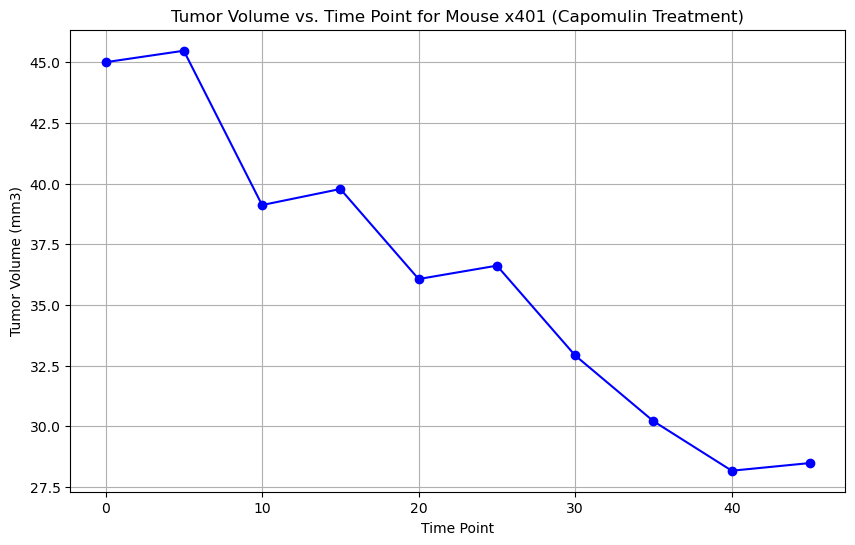

In [40]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import matplotlib.pyplot as plt

# Step 1: Choose a single mouse treated with Capomulin
selected_mouse = "x401"  

# Step 2: Filter the clean_data DataFrame for the selected mouse and Capomulin treatment regimen
selected_mouse_data = clean_data[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == selected_mouse)]

# Step 3: Create the line plot for tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"], marker='o', color='b')

# Set the plot title and labels
plt.title(f"Tumor Volume vs. Time Point for Mouse {selected_mouse} (Capomulin Treatment)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.grid(True)
plt.show()


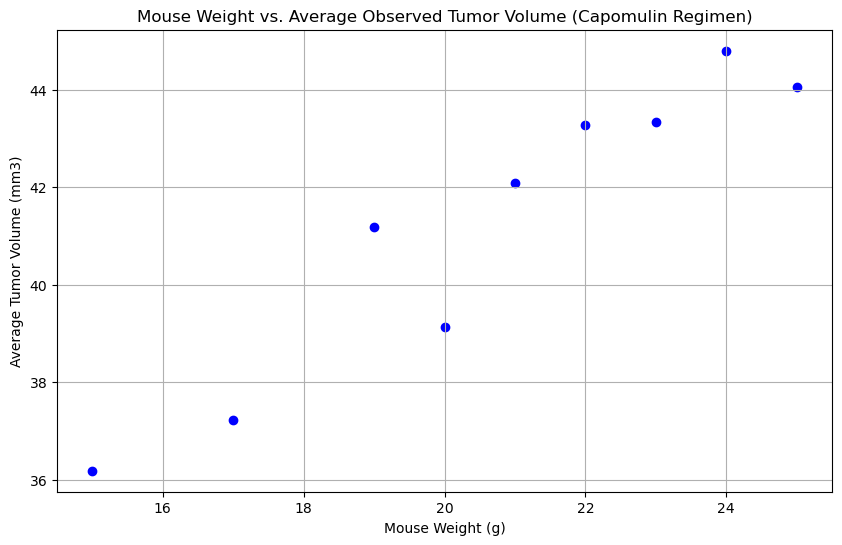

In [41]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

# Step 1: Filter the clean_data DataFrame for the Capomulin treatment regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Step 2: Group the filtered DataFrame by mouse weight and calculate the average observed tumor volume
average_tumor_volume_by_weight = capomulin_data.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

# Step 3: Create the scatter plot for mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume_by_weight.index, average_tumor_volume_by_weight.values, color='b', marker='o')

# Set the plot title and labels
plt.title("Mouse Weight vs. Average Observed Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.grid(True)
plt.show()


## Correlation and Regression

In [46]:
# Calculate the correlation coefficient and a linear regression model 
#data of Capomulin
capomulin_df = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin', ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
capomulin_df


,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876
...,...,...,...
440,i557,24,47.685963
1452,r157,25,45.000000
1453,r157,25,45.597064
1454,r157,25,46.059608


In [ ]:
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient and a linear regression model 
#data of Capomulin
capomulin_df = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin', ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
capomulin_df

In [47]:
#grouped data by Mouse ID and avg tumor volume
capomulin_grouped = capomulin_df.groupby('Mouse ID').mean()
capomulin_grouped


,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


In [48]:
#calculation of correlation coeficient
from scipy.stats import pearsonr

correlation, p_value = pearsonr(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation:.2f}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


In [49]:
#linear regression calculation
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
print(f"The slope of the regression line is {slope:.2f}")
print(f"The intercept of the regression line is {intercept:.2f}")
print(f"The R-squared value of the regression line is {r_value**2:.2f}")

The slope of the regression line is 0.95
The intercept of the regression line is 21.55
The R-squared value of the regression line is 0.71


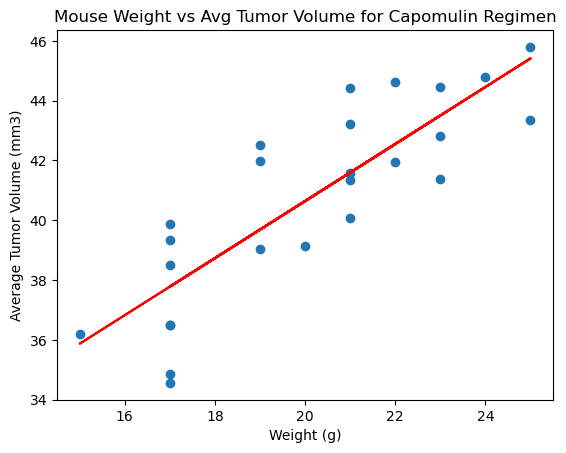

In [50]:
#plot linear regression
x_values = capomulin_grouped['Weight (g)']
y_values = capomulin_grouped['Tumor Volume (mm3)']

plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Avg Tumor Volume for Capomulin Regimen')
plt.plot(x_values, slope * x_values + intercept, color='red')
plt.show()